# Ankitha Pawar

# Task 5: SALES PREDICTION USING PYTHON

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the data set
data = pd.read_csv(r"Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
# checking the shape of dataset
data.shape

(200, 5)

In [6]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
# Remove the "Unnamed: 0" column
data.drop("Unnamed: 0",axis=1,inplace =True)

In [8]:
data.shape

(200, 4)

In [9]:
# checking basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# Checking for null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
# Checking the statistical information
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


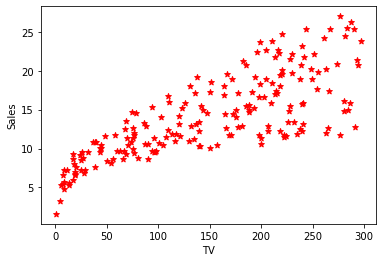

In [12]:
# visualize the data
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(data.TV,data.Sales,color='red',marker='*')

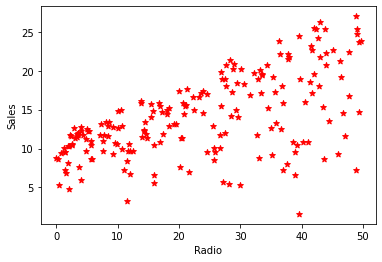

In [13]:
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.scatter(data.Radio,data.Sales,color='red',marker='*')

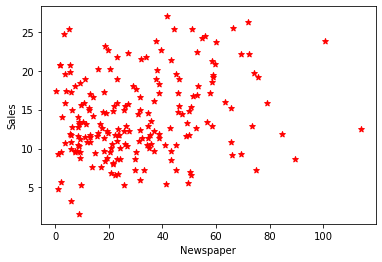

In [14]:
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.scatter(data.Newspaper,data.Sales,color='red',marker='*')

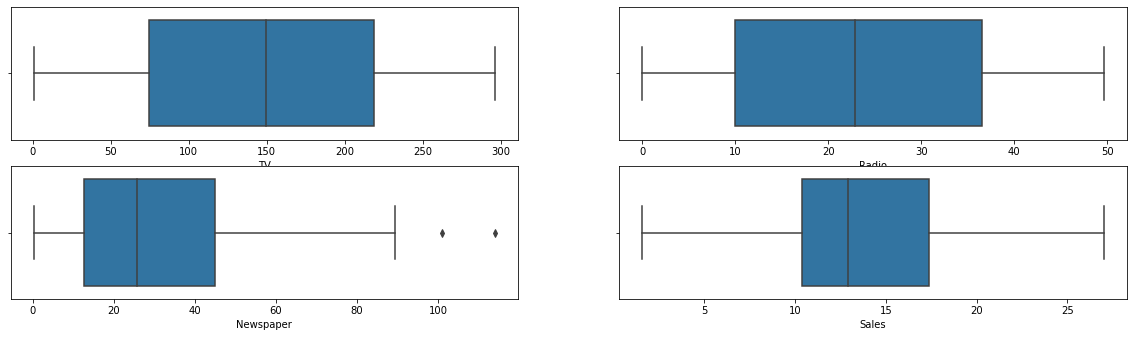

In [15]:
# Removing outliers(outliers are present)

j =1
plt.figure(figsize = (20,20))
for i in data.columns:
    plt.subplot(7,2,j)
    sns.boxplot(data[i])
    j=j+1
plt.show()


# Data processing and spliting

Independent and dependent variables

In [16]:
x= data.drop("Sales",axis =1)
y=data.Sales

In [17]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
#Creating model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
#Print Intercept and slope
print("Intercept : ", model.intercept_)
print("Slope : ", model.coef_)

Intercept :  2.99489303049533
Slope :  [ 0.04458402  0.19649703 -0.00278146]


In [26]:
#Prediction
y_Pred = model.predict(x_test)
y_Pred

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [29]:
# Calculation of R2 Score
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, x, y, cv=10, scoring="r2").mean())


0.8853562237979616


In [31]:
#Prediction with new values
new_x = [[500,300,400]]
print(model.predict(new_x))

[83.12342774]


# Conclusion

If company spend Rs.500 on TV, Rs. 300 on Radio and Rs.400 on NewsPaper advertisment than Sales will be 83.